# Wine Quality Dataset

# 1. Business Problem


* The two datasets is related to white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

* These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


# 2. Machine Learning Problem
## 2.1 Data Overview

This data set consists of 12 variables, with almost 5,000 observations.
#### Features
Input variables (based on physicochemical tests): 

* __fixed acidity__ : most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

* __volatile acidity__: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

* __citric acid__: found in small quantities, citric acid can add ‘freshness’ and flavor to wines

* __residual sugar__: the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

* __chlorides__: the amount of salt in the wine

* __free sulfur dioxide__: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

* __total sulfur dioxide__: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

* __density__: the density of water is close to that of water depending on the percent alcohol and sugar content

* __pH__: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

* __sulphates__: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

* __alcohol__: the percent alcohol content of the wine
#### Output variable (based on sensory data):


* __quality__ (score between 0 and 10)




## 2.2 Mapping business problem to ML problem
### 2.2.1 Type of Machine Learning Problem
It can be viewed as classification or regression problem to determine the quality of wine.

### 2.2.2 Performance Metric (KPI)

#### 2.2.2.1 Root Mean Squared Error (RMSE)

![title](Images/rmse.gif)

#### 2.2.2.2 R-squared
![title](Images/r_squared.png)



# 3. Exploratory Data Analysis

#### Import the libraries

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function to perform data standardization 
from sklearn.preprocessing import StandardScaler

# Libraries to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

# Import classes for ML Models
from sklearn.linear_model import Ridge  ## Linear Regression + L2 regularization
from sklearn.svm import SVR ## Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# To save the final model on disk
from sklearn.externals import joblib  ## Reference http://scikit-learn.org/stable/modules/model_persistence.html

## 3.1 Load Wine data from CSV

In [2]:
df = pd.read_csv('dataset/winequality-data.csv')

In [3]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985


In [4]:
df.drop(['id'], axis=1,inplace=True)

In [5]:
df.shape ## check the size of data

(3918, 12)

In [6]:
df.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.quality.value_counts()

6    1752
5    1163
7     707
8     140
4     134
3      17
9       5
Name: quality, dtype: int64

In [8]:
df.quality.value_counts()/len(df)*100

6    44.716692
5    29.683512
7    18.044921
8     3.573252
4     3.420112
3     0.433895
9     0.127616
Name: quality, dtype: float64

### Skewed Dataset
It’s clear from the above table that there is a very big class imbalance. There are 4898 samples where 44% of data belongs to class 6 29% of class 5 and 18% of class 7 whereas data of other classes are very few.  There are not enough samples of those classes to split the data into useable training and test sets and perform cross-validation.

In [9]:
df.dtypes

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## 3.2 Distributions of numeric features
One of the most enlightening data exploration tasks is plotting the distributions of your features.

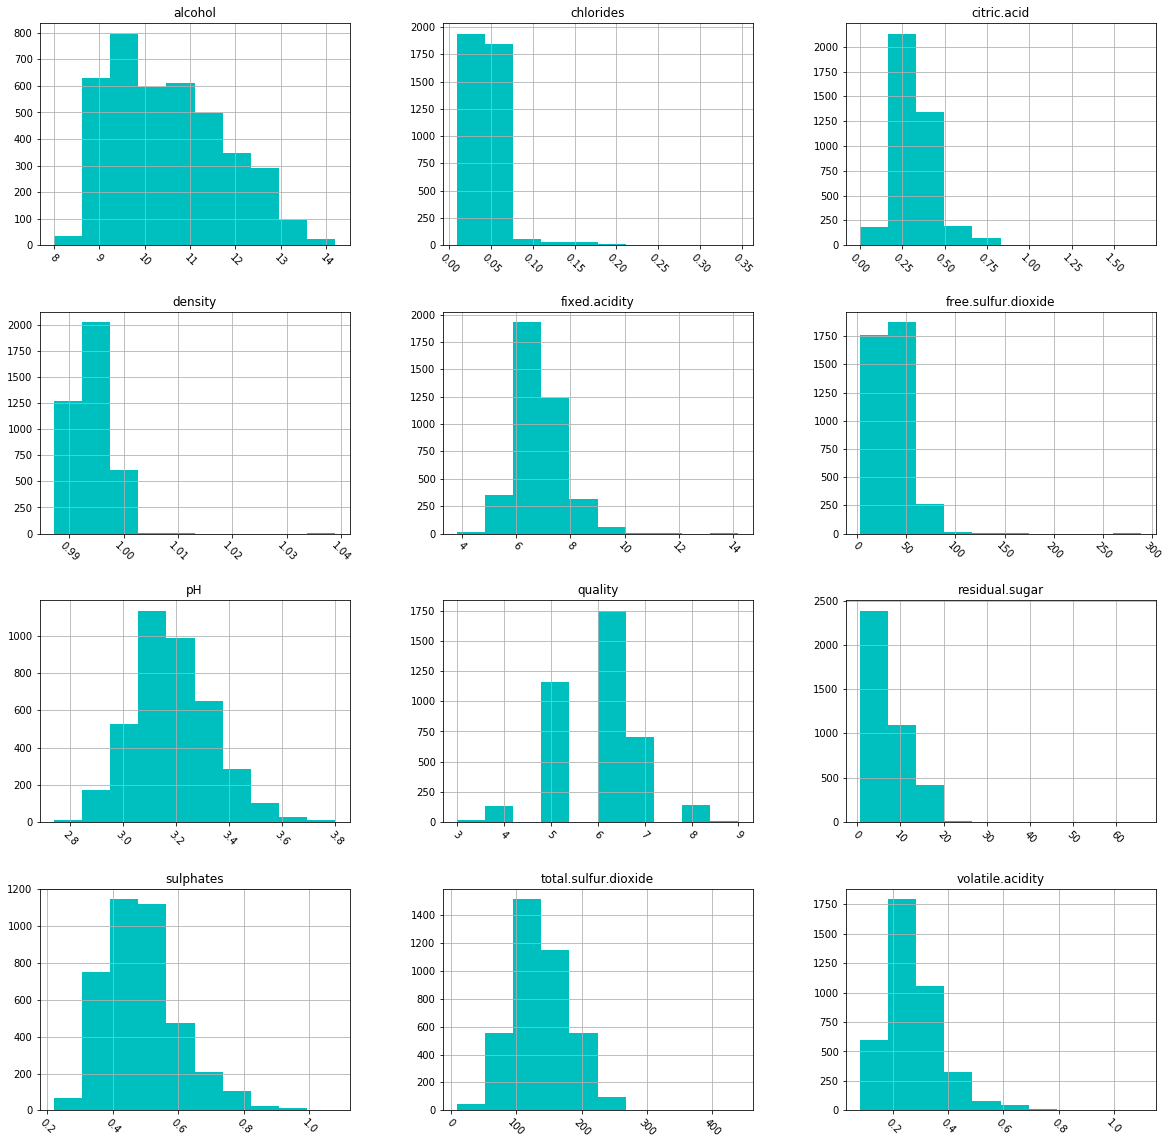

In [10]:
# Plot histogram grid
df.hist(figsize=(20,20), xrot=-45,color='c') ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

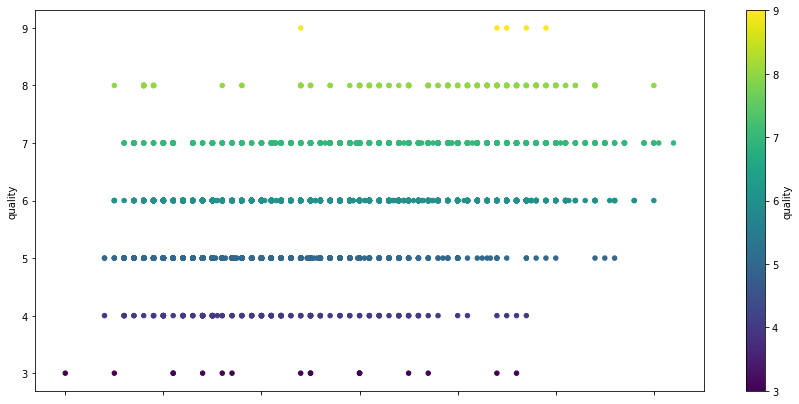

In [11]:
 df.plot.scatter(x='alcohol',y='quality',c='quality',colormap='viridis',figsize=(15,7))

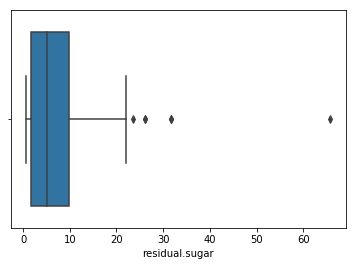

In [12]:
sns.boxplot(df['residual.sugar'])

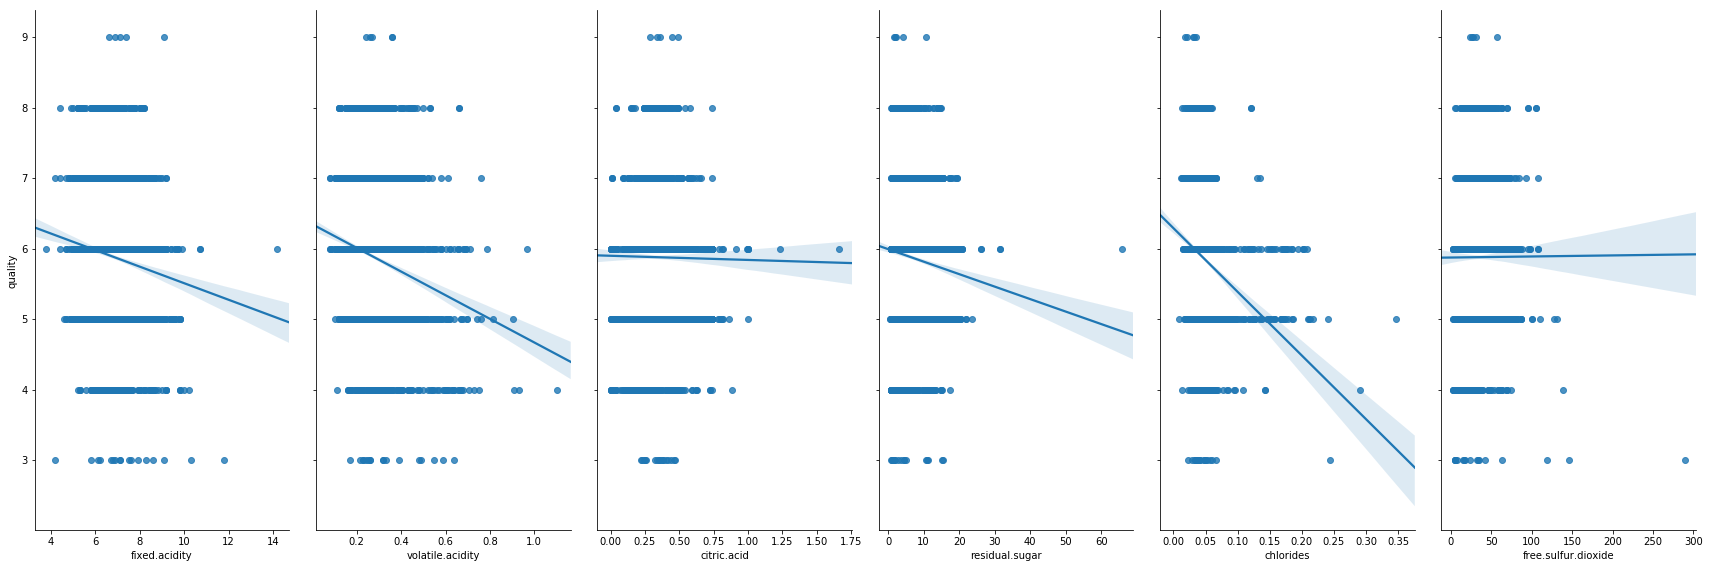

In [16]:
features = ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar','chlorides', 'free.sulfur.dioxide', ]
x = df[features]
y = df['quality']
#plotting features vs quality
sns.pairplot(df,x_vars=features,y_vars='quality',kind='reg',size=8,aspect=0.5)

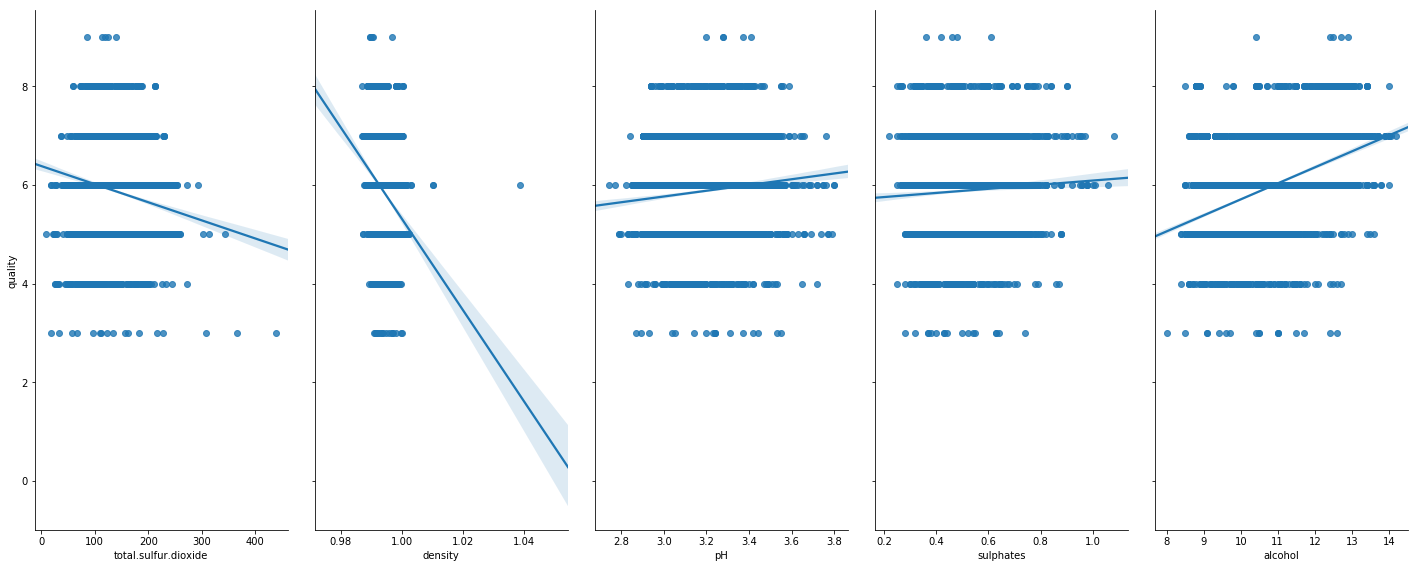

In [18]:
features = ['total.sulfur.dioxide', 'density','pH', 'sulphates', 'alcohol']
x = df[features]
y = df['quality']
#plotting features vs quality
sns.pairplot(df,x_vars=features,y_vars='quality',kind='reg',size=8,aspect=0.5)

### Observations:

1. From regression plot we can see that __alcohol__ ,__sulphates__ and __volatile acidity__ have strong relationship with quality.
2. __free sulfur dioxide__ ,__citric_acid__ and __residual sugar__ have weak realtionship with quality.


### Correltaion among each variables

In [19]:
df.corr()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.018244,0.297831,0.093249,0.017633,-0.057874,0.079012,0.267259,-0.431066,-0.011915,-0.126329,-0.111060
volatile.acidity,-0.018244,1.000000,-0.140043,0.077979,0.069602,-0.096284,0.088366,0.033974,-0.045407,-0.032703,0.071912,-0.189113
citric.acid,0.297831,-0.140043,1.000000,0.106384,0.109368,0.088143,0.114861,0.157975,-0.165478,0.059628,-0.077949,-0.008064
residual.sugar,0.093249,0.077979,0.106384,1.000000,0.096991,0.303088,0.411613,0.842294,-0.199808,-0.012444,-0.453181,-0.101570
chlorides,0.017633,0.069602,0.109368,0.096991,1.000000,0.101693,0.195431,0.260935,-0.086290,0.014115,-0.363394,-0.214543
free.sulfur.dioxide,-0.057874,-0.096284,0.088143,0.303088,0.101693,1.000000,0.623179,0.294149,0.004650,0.063534,-0.250605,0.002892
total.sulfur.dioxide,0.079012,0.088366,0.114861,0.411613,0.195431,0.623179,1.000000,0.532155,0.002910,0.143494,-0.451141,-0.177076
density,0.267259,0.033974,0.157975,0.842294,0.260935,0.294149,0.532155,1.000000,-0.101704,0.080072,-0.778263,-0.313763
pH,-0.431066,-0.045407,-0.165478,-0.199808,-0.086290,0.004650,0.002910,-0.101704,1.000000,0.151962,0.123085,0.097981
sulphates,-0.011915,-0.032703,0.059628,-0.012444,0.014115,0.063534,0.143494,0.080072,0.151962,1.000000,-0.010429,0.053632


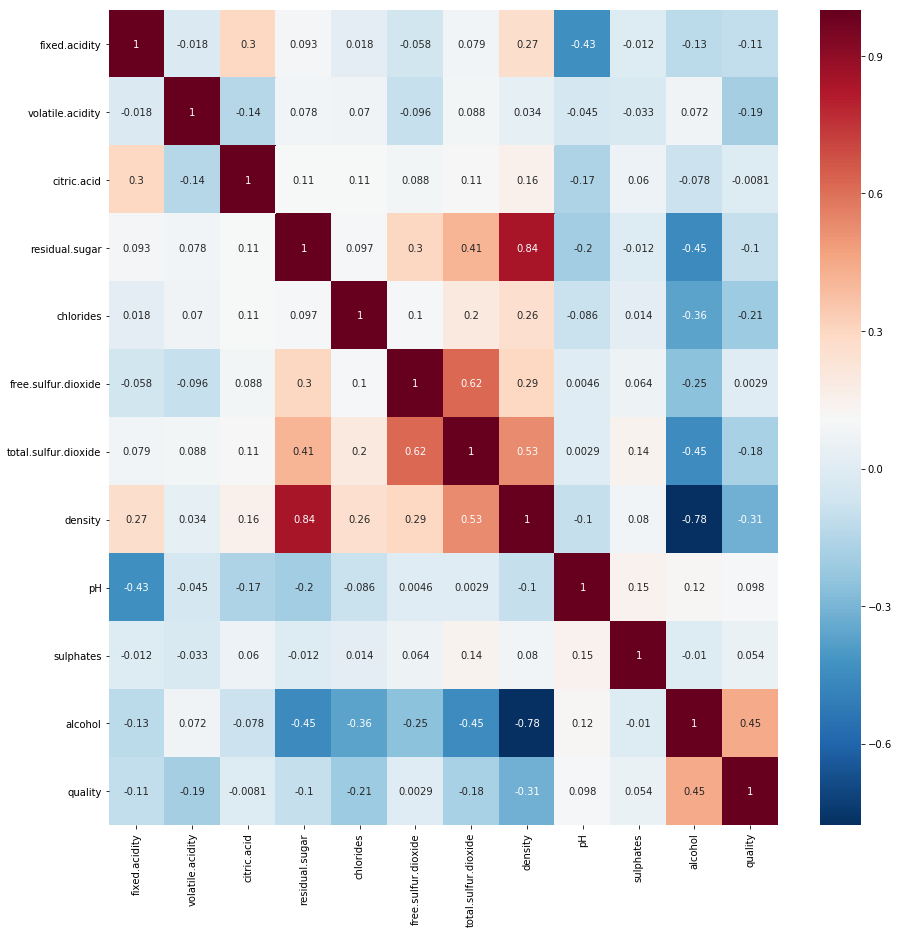

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='RdBu_r')

In [15]:
df['residual.sugar'].describe()

count    3918.000000
mean        6.405819
std         5.107972
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual.sugar, dtype: float64

# 4. Data Cleaning

### 4.1 Removing duplicates from data

In [70]:
df = df.drop_duplicates()
print( df.shape )

(3298, 12)


Earlier there were 3918 datapoints wheresas after droppping duplicates we left with 3298 which implies there were around 620 duplicates in dataset

### 4.2 Removing unnecessary features

From the correlation plot we can see that citirc acid has no effect on prediciting quality of wine so removing it will not make any difference to our predicition.

In [71]:
df.drop(['citric.acid'], axis=1,inplace=True)

In [72]:
df.shape

(3298, 11)

### 4.3 Removing Outliers

Regression plot of __residual sugar__ with __quality__

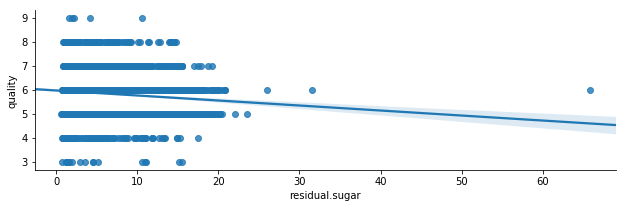

In [29]:
features = [ 'residual.sugar' ]
x = df[features]
y = df['quality']
#plotting features vs quality
sns.pairplot(df,x_vars=features,y_vars='quality',kind='reg',size=3,aspect=3)

In [43]:
df['residual.sugar'].sort_values(ascending=False).head()

269     65.80
1612    31.60
2337    26.05
2714    23.50
2396    22.00
Name: residual.sugar, dtype: float64

In the EU, a wine with more than __45g/l__ of sugar is considered a sweet wine. The outlier has a residual.sugar level of __65.8. __The immediate highest value is around __31.6g/l__,so we can clearly remove this outlier.

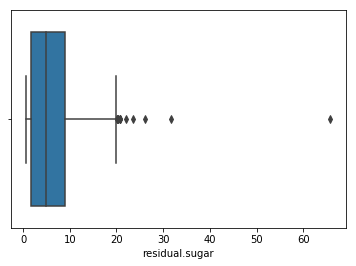

In [30]:
sns.boxplot(df['residual.sugar'])

In [75]:
df[df['residual.sugar']==df['residual.sugar'].max()]

,fixed.acidity,volatile.acidity,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
269,7.8,0.965,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


Similarly density of the wine having residual.sugar as __65.8__ is again an outlier ie. __1.0389__,so removing 1 outlier we can are removing 2 outliers.

Regression plot of __density__ with __quality__

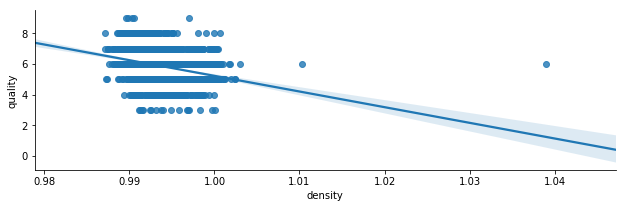

In [74]:
features = [ 'density' ]
x = df[features]
y = df['quality']
#plotting features vs quality
sns.pairplot(df,x_vars=features,y_vars='quality',kind='reg',size=3,aspect=3)

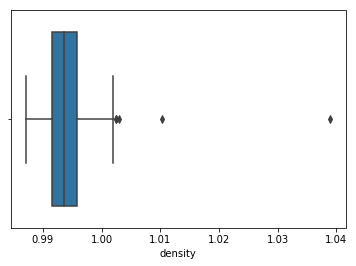

In [73]:
sns.boxplot(df['density'])

In [76]:
y=df[df['residual.sugar']==df['residual.sugar'].max()]

In [77]:
df.drop(df.index[269:270], inplace=True)

In [78]:
df.shape

(3297, 11)

In [79]:
df = df.reset_index(drop=True)

After removing Outlier

### Residual.sugar

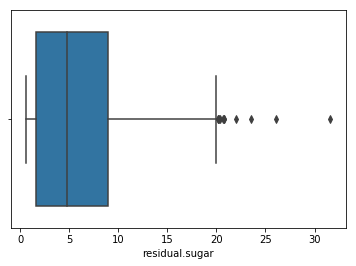

In [66]:
sns.boxplot(df['residual.sugar'])

### Density

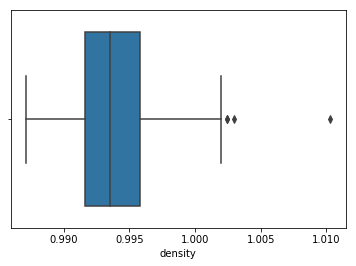

In [67]:
sns.boxplot(df['density'])

In [81]:
# Save analytical base table
df.to_csv('dataset/featurized_data.csv', index=None)

## 5.  Machine Learning Models
## 5.1 Data Preparation

In [83]:
df = pd.read_csv("dataset/featurized_data.csv")

In [84]:
df.shape

(3297, 11)

### 5.1.1 Train and Test Splits
Separate your dataframe into separate objects for the target variable (y) and the input features (X) and perform the train and test split

In [85]:
# Create separate object for target variable
y = df.quality

# Create separate object for input features
X = df.drop('quality', axis=1)

In [86]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1235,
                                                    stratify=df.quality)



In [87]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2637, 10) (660, 10) (2637,) (660,)


### 5.1.2 Data standardization

In [88]:
train_mean = X_train.mean()
train_std = X_train.std()

In [89]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [90]:
## Check for mean and std dev.
X_train.describe()

,fixed.acidity,volatile.acidity,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
count,2.637000e+03,2.637000e+03,2.637000e+03,2.637000e+03,2.637000e+03,2.637000e+03,2.637000e+03,2.637000e+03,2.637000e+03,2.637000e+03
mean,1.015822e-14,2.388264e-15,-2.189922e-15,-1.899775e-14,6.087912e-17,-1.601550e-16,9.365303e-13,5.287689e-14,-1.910531e-14,-1.802068e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.568234e+00,-1.955849e+00,-1.119252e+00,-1.651758e+00,-1.856450e+00,-2.948344e+00,-2.364924e+00,-3.015355e+00,-2.400016e+00,-2.098974e+00
25%,-6.435610e-01,-6.753451e-01,-9.122031e-01,-4.741293e-01,-7.041707e-01,-7.247571e-01,-7.674744e-01,-6.977730e-01,-7.037542e-01,-8.808580e-01
50%,-5.862654e-02,-1.828437e-01,-2.496478e-01,-1.570755e-01,-1.280310e-01,-1.058205e-01,-9.746221e-02,-1.018234e-01,-1.680925e-01,-1.499884e-01
75%,5.263080e-01,4.081580e-01,6.199561e-01,2.052717e-01,6.209505e-01,6.735811e-01,6.994996e-01,6.265594e-01,5.461230e-01,6.620888e-01
max,8.598404e+00,8.091180e+00,4.150134e+00,1.361212e+01,1.462114e+01,6.931717e+00,3.220861e+00,4.003607e+00,5.277801e+00,2.935905e+00


In [91]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [92]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,fixed.acidity,volatile.acidity,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,-0.027785,0.041692,0.004928,0.005912,-0.048637,-0.030398,0.011789,-0.047546,0.055776,-0.015257
std,1.022858,1.017175,1.005518,0.957330,0.977240,0.980875,1.032960,0.976565,1.057466,0.994573
min,-2.866312,-1.758848,-1.098547,-1.379997,-1.856450,-2.604490,-2.241501,-2.485622,-2.132185,-1.774143
25%,-0.643561,-0.675345,-0.891498,-0.428836,-0.761785,-0.724757,-0.781580,-0.697773,-0.614477,-0.880858
50%,-0.175613,-0.182844,-0.270353,-0.111782,-0.128031,-0.174591,-0.111568,-0.101823,-0.078816,-0.149988
75%,0.526308,0.506658,0.625132,0.205272,0.563337,0.610541,0.699500,0.560343,0.635400,0.662089
max,5.790719,6.416675,5.299253,8.811017,5.518138,4.020423,5.812750,3.672524,4.652863,2.773490


## 5.2 Model 1 - Baseline Model
* In this model, for every test data point, we will simply predict the average of the train labels as the output.

In [93]:
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [94]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()

In [95]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))


Train Results for Baseline Model:
*******************************
Root mean squared error:  0.8962881281457055
R-squared:  0.0


In [96]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))


Results for Baseline Model:
*******************************
Root mean squared error:  0.892037575330212
R-squared:  -1.28072417813e-05


In [97]:
acc=accuracy_score(y_test,y_pred.astype(int),normalize=True)*float(100)
acc

29.848484848484848

In [98]:
confusion_matrix(y_test, y_pred.astype(int)).T

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  3,  25, 197, 295, 117,  22,   1],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=int64)

## 5.3 Model 2- Ridge Regression

In [119]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [120]:
model.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [121]:
## Predict Train set results
y_train_pred = model.predict(X_train)

In [122]:
## Predict Test set results
y_pred = model.predict(X_test)

In [123]:

print("Train Results for Ridge Regression Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))


Train Results for Ridge Regression Model:
*******************************
Root mean squared error:  0.7437440880019137
R-squared:  0.311424184462


In [124]:
print("Results for Ridge Regression  Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))


Results for Ridge Regression  Model:
*******************************
Root mean squared error:  0.7492552410273937
R-squared:  0.294497033894


In [125]:
confusion_matrix(y_test, y_pred.astype(int)).T

array([[  0,   1,   0,   0,   0,   0,   0],
       [  0,   6,  17,   6,   0,   0,   0],
       [  3,  17, 157, 164,  28,   6,   0],
       [  0,   1,  23, 125,  88,  16,   1],
       [  0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [126]:
acc=accuracy_score(y_test,y_pred.astype(int),normalize=True)*float(100)
acc

43.787878787878789

### Feature Importance

In [128]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=1)
model.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [129]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
density
residual.sugar
volatile.acidity
pH
alcohol
fixed.acidity
sulphates
free.sulfur.dioxide
total.sulfur.dioxide
chlorides


## 5.4 Model 3- Support Vector Regression
With an RBF Kernel

In [130]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 20 minutes

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [131]:
model.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [132]:
## Building the model again with the best hyperparameters
model = SVR(C=1, gamma=0.1)
model.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [133]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [134]:
## Predict Test results
y_pred = model.predict(X_test)

In [135]:
print("Train Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))


Train Results for Support Vector Regression:
*******************************
Root mean squared error:  0.6473670613316989
R-squared:  0.478317932176


In [136]:
print("Test Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))


Test Results for Support Vector Regression:
*******************************
Root mean squared error:  0.7270739440273936
R-squared:  0.335650783148


In [137]:
confusion_matrix(y_test, y_pred.astype(int)).T

array([[  0,   0,   0,   0,   0,   0,   0],
       [  1,   7,  35,  13,   0,   0,   0],
       [  2,  17, 145, 159,  26,   6,   0],
       [  0,   1,  17, 121,  84,  15,   1],
       [  0,   0,   0,   2,   7,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [138]:
acc=accuracy_score(y_test,y_pred.astype(int),normalize=True)*float(100)
acc

42.424242424242422

## 5.5 Model-4 Random Forest Regression

In [139]:
## Reference for random search on random forest
## https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 15 minutes

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=0)

In [140]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [141]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [142]:
## Predict Test results
y_pred = model.predict(X_test)

In [143]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))


Train Results for Random Forest Regression:
*******************************
Root mean squared error:  0.3345313724117451
R-squared:  0.860691243224


In [144]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))


Test Results for Random Forest Regression:
*******************************
Root mean squared error:  0.7003968535616223
R-squared:  0.383507726764


### Feature Importance

In [145]:
## Building the model again with the best hyperparameters
model = RandomForestRegressor(n_estimators=300, min_samples_split=10, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [146]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
alcohol
volatile.acidity
free.sulfur.dioxide
total.sulfur.dioxide
pH
residual.sugar
fixed.acidity
density
chlorides
sulphates


In [147]:
confusion_matrix(y_test, y_pred.astype(int)).T

array([[  0,   0,   0,   0,   0,   0,   0],
       [  1,  13,  21,   8,   0,   0,   0],
       [  2,  11, 155, 153,  23,   6,   0],
       [  0,   1,  21, 131,  87,  13,   1],
       [  0,   0,   0,   3,   7,   3,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [148]:
acc=accuracy_score(y_test,y_pred.astype(int),normalize=True)*float(100)
acc

46.36363636363636

## 5.6 Model-5 XGBoost Regression

In [149]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBRegressor
from xgboost import plot_importance  ## to plot feature importance

In [150]:
## Reference for random search on xgboost
## https://gist.github.com/wrwr/3f6b66bf4ee01bf48be965f60d14454d
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=0)

In [151]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [152]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [153]:

## Predict Test results
y_pred = model.predict(X_test)

In [154]:

print("Train Results for XGBooster Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))


Train Results for XGBooster Model:
*******************************
Root mean squared error:  0.6340229902530489
R-squared:  0.499602969034


In [155]:
print("Results for  XGBooster Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))


Results for  XGBooster Model:
*******************************
Root mean squared error:  0.7152040478783993
R-squared:  0.357165476515


In [177]:
acc=accuracy_score(y_test,y_pred.astype(int),normalize=True)*float(100)
acc

43.877551020408163

### Feature Importance

In [156]:
## Building the model again with the best hyperparameters
model = XGBRegressor(max_depth=4,learning_rate=0.1,n_estimators=400, reg_lambda=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [157]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
fixed.acidity
residual.sugar
density
volatile.acidity
free.sulfur.dioxide
total.sulfur.dioxide
chlorides
pH
alcohol
sulphates


In [158]:
## Function to include figsize parameter
## Reference: https://stackoverflow.com/questions/40081888/xgboost-plot-importance-figure-size
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

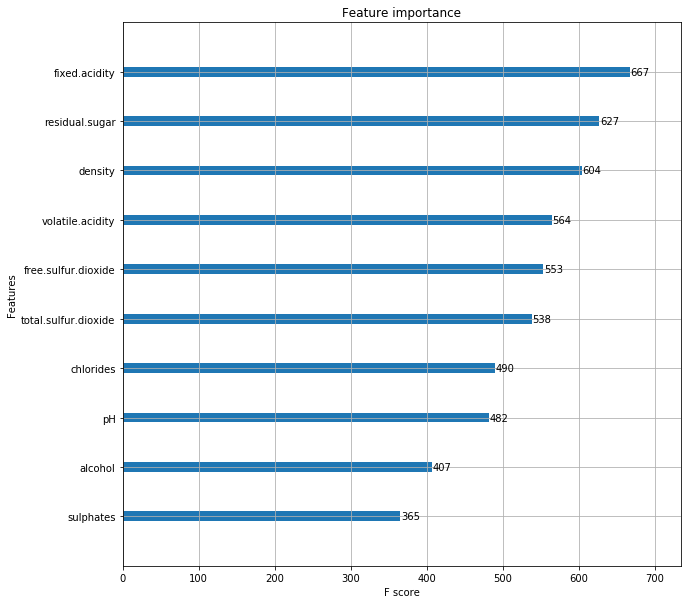

In [159]:
my_plot_importance(model, (10,10))

#### Reuslts
![title](Images/results.png)



In [160]:
win_model = RandomForestRegressor(n_estimators=400, min_samples_split=10, min_samples_leaf=4)
win_model.fit(X_train, y_train)
joblib.dump(win_model, 'win_wine_quality.pkl') 

['win_wine_quality.pkl']